# Data preprocessing - continued

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataframe_checks import check_column_order, check_time_column, check_col_types, check_missing_values, data_report, plot_time_series

In [2]:
Miguel_path = "C:/Users/User/Desktop/Project_repos/timecave";
raw_path = "timecave/experiments/datasets/raw";

In [3]:
path = f"{Miguel_path}/{raw_path}";

## NY Taxi dataset

In [4]:
taxi_data = pd.read_csv(f"{path}/NYC Taxi Traffic/dataset.csv", index_col=[0], parse_dates=["timestamp"]);

In [5]:
taxi_data

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [6]:
data_report(taxi_data, "timestamp", "30min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [7]:
taxi_data.dtypes

timestamp    datetime64[ns]
value                 int64
dtype: object

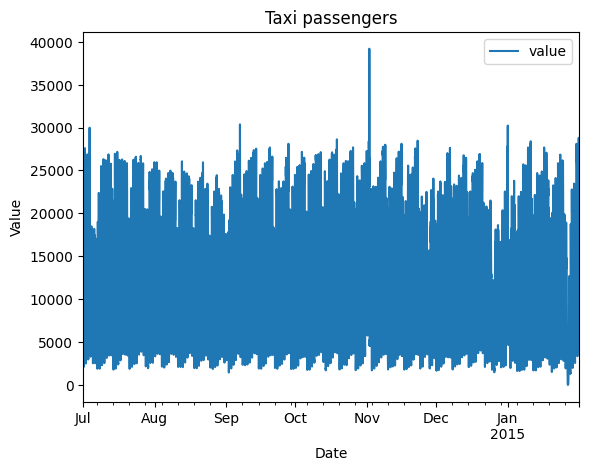

In [8]:
plot_time_series(taxi_data, title="Taxi passengers");

In [9]:
taxi_data.shape

(10320, 2)

In [10]:
taxi_data.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/taxi_data.csv", index=False);

## Electric Power Consumption

In [11]:
power_consumption_data = pd.read_csv(f"{path}/Electric Power Consumption/powerconsumption.csv", parse_dates=["Datetime"]);

In [12]:
power_consumption_data

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [13]:
data_report(power_consumption_data, "Datetime", freq="10min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [14]:
power_consumption_data.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/power_consumption_data.csv", index=False);

## Room Occupancy Detection

In [15]:
room_occupancy_detection = pd.read_csv(f"{path}/Room Occupancy Detection/Occupancy.csv", parse_dates=["date"]);

In [16]:
data_report(room_occupancy_detection, "date", "min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 2181
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [17]:
room_occupancy_detection["date"] = room_occupancy_detection["date"].dt.round("min");

In [18]:
data_report(room_occupancy_detection, "date", "min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 2181
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [19]:
room_occupancy_detection = check_time_column(room_occupancy_detection, "date", "min", fix=True);

3. Number of missing timesteps: 2181
4. Number of duplicated timesteps: 0


In [20]:
data_report(room_occupancy_detection, "date", "min")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column 'Temperature' : 2181
Number of missing values in column 'Humidity' : 2181
Number of missing values in column 'Light' : 2181
Number of missing values in column 'CO2' : 2181
Number of missing values in column 'HumidityRatio' : 2181
Number of missing values in column 'Occupancy' : 2181
5. Number of Time Series with missing values : 6
________________________________________________________________


In [21]:
room_occupancy_detection = check_missing_values(room_occupancy_detection, alpha=0.1, fix=True);

Number of missing values in column 'Temperature' : 2181
Number of missing values in column 'Humidity' : 2181
Number of missing values in column 'Light' : 2181
Number of missing values in column 'CO2' : 2181
Number of missing values in column 'HumidityRatio' : 2181
Number of missing values in column 'Occupancy' : 2181
5. Number of Time Series with missing values : 6


In [22]:
data_report(room_occupancy_detection, "date", "min")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


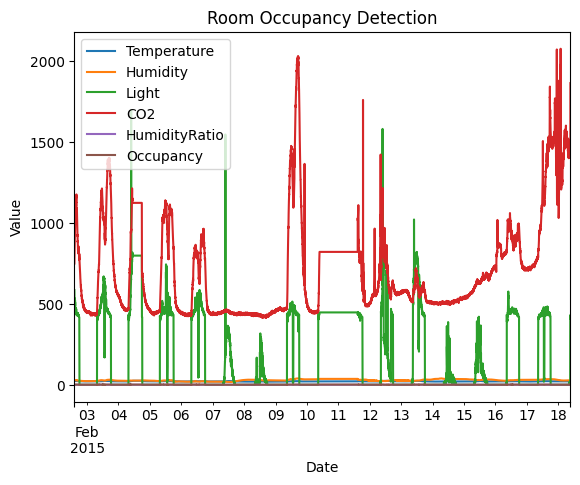

In [23]:
plot_time_series(room_occupancy_detection, legend=True, title="Room Occupancy Detection");

In [24]:
room_occupancy_detection.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/room_occupancy_data.csv", index=False);

## Forest Fires in Brazil

In [25]:
fires_data = pd.read_csv(f"{path}/Forest Fires in Brazil/amazon.csv", encoding="ISO-8859-1", parse_dates=["date"]);

In [26]:
fires_data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [27]:
fires_data.groupby("state")[["number"]].count()

,number
state,
Acre,239
Alagoas,240
Amapa,239
Amazonas,239
Bahia,239
Ceara,239
Distrito Federal,239
Espirito Santo,239
Goias,239


In [28]:
fires_data = fires_data.loc[fires_data["state"].isin(["Rio"])].copy();

In [29]:
meses = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"];
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"];

In [30]:
fires_data = fires_data.replace(to_replace=meses, value=months);

In [31]:
fires_data["Date"] = fires_data["month"] + "-" + fires_data["year"].astype(str);

In [32]:
fires_data["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [33]:
fires_data["Date"] = pd.to_datetime(fires_data["Date"], format="%B-%Y");

In [34]:
fires_data

,year,state,month,number,date,Date
4303,1998,Rio,January,0.0,1998-01-01,1998-01-01
4304,1999,Rio,January,0.0,1999-01-01,1999-01-01
4305,2000,Rio,January,0.0,2000-01-01,2000-01-01
4306,2001,Rio,January,0.0,2001-01-01,2001-01-01
4307,2002,Rio,January,0.0,2002-01-01,2002-01-01
...,...,...,...,...,...,...
5015,2012,Rio,December,38.0,2012-01-01,2012-12-01
5016,2013,Rio,December,62.0,2013-01-01,2013-12-01
5017,2014,Rio,December,31.0,2014-01-01,2014-12-01
5018,2015,Rio,December,42.0,2015-01-01,2015-12-01


In [35]:
fires_data = fires_data.reset_index().drop(columns=["month", "state", "year", "index", "date"]);

In [36]:
fires_data

,number,Date
0,0.0,1998-01-01
1,0.0,1999-01-01
2,0.0,2000-01-01
3,0.0,2001-01-01
4,0.0,2002-01-01
...,...,...
712,38.0,2012-12-01
713,62.0,2013-12-01
714,31.0,2014-12-01
715,42.0,2015-12-01


In [37]:
data_report(fires_data, "Date", "MS")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. FAILED: First column is not time column!
First column type is not datetime-like
Column 'Date' type is not float or int: datetime64[ns]
2. Total 2 columns have wrong types.
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 478
5. Number of Time Series with missing values : 0
________________________________________________________________


In [38]:
fires_data.dtypes

number           float64
Date      datetime64[ns]
dtype: object

In [39]:
check_column_order(fires_data, "Date")

1. FAILED: First column is not time column!


In [40]:
number = fires_data["number"].copy();

In [41]:
date = fires_data["Date"].copy();

In [42]:
new_fires_data = pd.concat([date, number], axis=1);

In [43]:
fires_data["Date"].unique().shape[0]

239

In [44]:
data_report(new_fires_data, "Date", "MS");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 478
5. Number of Time Series with missing values : 0
________________________________________________________________


In [45]:
new_fires_data = check_time_column(new_fires_data, "Date", "MS", fix=True);

3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 478


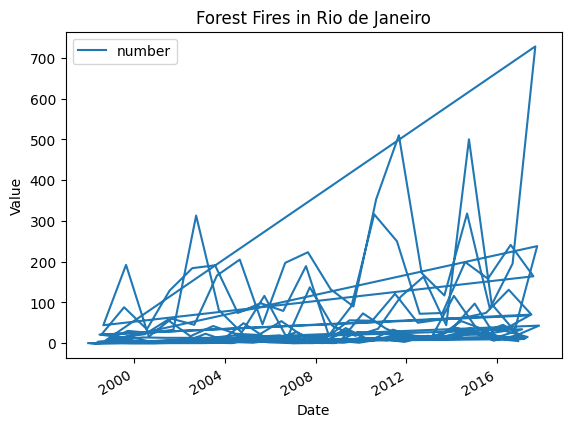

In [46]:
plot_time_series(new_fires_data, legend=True, title="Forest Fires in Rio de Janeiro");

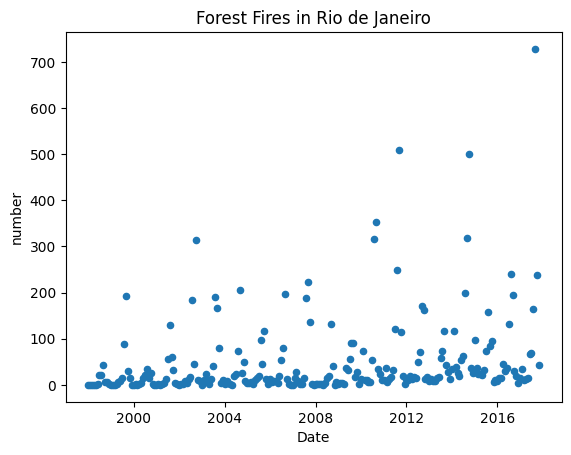

In [47]:
new_fires_data.plot(kind="scatter", x="Date", y="number", title="Forest Fires in Rio de Janeiro");

In [48]:
new_fires_data.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/forest_fires_Rio_Janeiro.csv", index=False);

## Energy Generation Time Series

In [49]:
energy_gen_data = pd.read_csv(f"{path}/Electricity Generation Time Series/electricity_data.csv", parse_dates=[0]);

In [50]:
energy_gen_data.dtypes

Unnamed: 0                                     datetime64[ns]
United States : all sectors                             int64
United States : electric utility                        int64
United States : independent power producers             int64
United States : all commercial                          int64
                                                    ...      
Hawaii : all sectors                                    int64
Hawaii : electric utility                               int64
Hawaii : independent power producers                    int64
Hawaii : all commercial                                object
Hawaii : all industrial                                 int64
Length: 311, dtype: object

In [51]:
energy_gen_data = energy_gen_data.rename(columns={"Unnamed: 0": "Date"});

In [52]:
cols = ["Date", "Alaska : all sectors", "California : electric utility", "Massachusetts : independent power producers", "Texas : all commercial", "Florida : all industrial"];

In [53]:
energy_gen_data = energy_gen_data[cols];

In [54]:
data_report(energy_gen_data, "Date", "MS");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


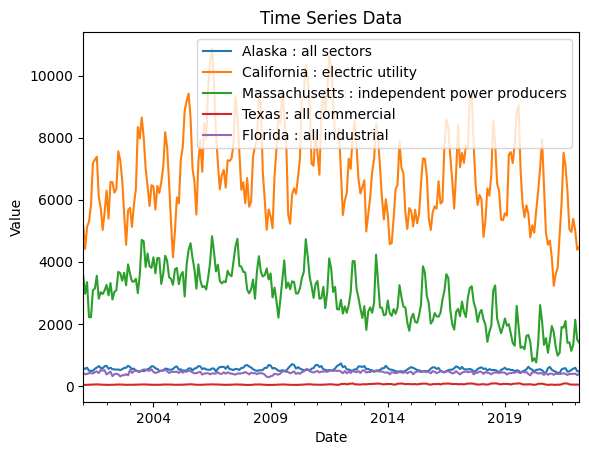

In [55]:
plot_time_series(energy_gen_data);

In [56]:
energy_gen_data.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/US_energy_generation_data.csv", index=False);

## Jena Climate Dataset

In [70]:
jena_dataset = pd.read_csv(f"{path}/Jena Climate Dataset/jena_climate_2009_2016.csv", parse_dates=["Date Time"], date_format="%d.%m.%Y %H:%M:%S");

In [71]:
jena_dataset

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,2016-12-31 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,2016-12-31 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,2016-12-31 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,2016-12-31 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [74]:
data_report(jena_dataset, "Date Time", "10min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 544
4. Number of duplicated timesteps: 327
5. Number of Time Series with missing values : 0
________________________________________________________________


In [78]:
jena_dataset = check_time_column(jena_dataset, "Date Time", "10min", fix=True);

3. Number of missing timesteps: 544
4. Number of duplicated timesteps: 327


In [80]:
data_report(jena_dataset, "Date Time", "10min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column 'p (mbar)' : 544
Number of missing values in column 'T (degC)' : 544
Number of missing values in column 'Tpot (K)' : 544
Number of missing values in column 'Tdew (degC)' : 544
Number of missing values in column 'rh (%)' : 544
Number of missing values in column 'VPmax (mbar)' : 544
Number of missing values in column 'VPact (mbar)' : 544
Number of missing values in column 'VPdef (mbar)' : 544
Number of missing values in column 'sh (g/kg)' : 544
Number of missing values in column 'H2OC (mmol/mol)' : 544
Number of missing values in column 'rho (g/m**3)' : 544
Number of missing values in column 'wv (m/s)' : 544
Number of missing values 

In [83]:
jena_dataset = check_missing_values(jena_dataset, alpha=0.1, fix=True);

Number of missing values in column 'p (mbar)' : 544
Number of missing values in column 'T (degC)' : 544
Number of missing values in column 'Tpot (K)' : 544
Number of missing values in column 'Tdew (degC)' : 544
Number of missing values in column 'rh (%)' : 544
Number of missing values in column 'VPmax (mbar)' : 544
Number of missing values in column 'VPact (mbar)' : 544
Number of missing values in column 'VPdef (mbar)' : 544
Number of missing values in column 'sh (g/kg)' : 544
Number of missing values in column 'H2OC (mmol/mol)' : 544
Number of missing values in column 'rho (g/m**3)' : 544
Number of missing values in column 'wv (m/s)' : 544
Number of missing values in column 'max. wv (m/s)' : 544
Number of missing values in column 'wd (deg)' : 544
5. Number of Time Series with missing values : 14


In [84]:
data_report(jena_dataset, "Date Time", "10min");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [85]:
jena_dataset.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/jena_climate_data.csv", index=False);

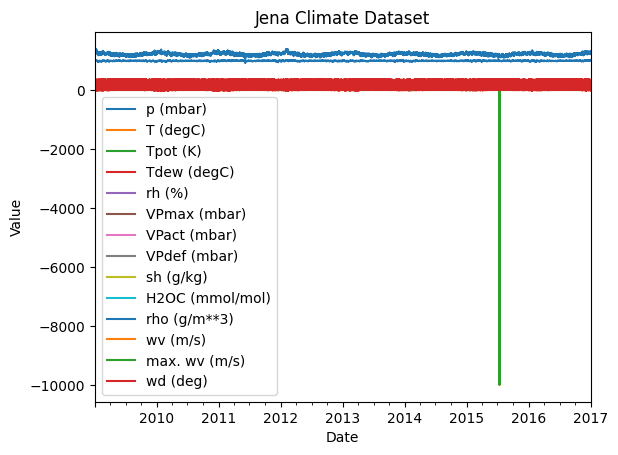

In [116]:
plot_time_series(jena_dataset, title="Jena Climate Dataset");

## River Aire Discharge Time Series

In [90]:
aire_discharge = pd.read_csv(f"{path}/River Aire Discharge Time Series/river_aire_discharge_timeseries.csv", parse_dates=["Date"]);

C:\Users\User\AppData\Local\Temp\ipykernel_1852\3089305213.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  aire_discharge = pd.read_csv(f"{path}/River Aire Discharge Time Series/river_aire_discharge_timeseries.csv", parse_dates=["Date"]);


In [91]:
aire_discharge.columns

Index(['Date', 'SF_absolute_humidity', 'SF_relative_humidity',
       'SF_mean_air_temperature', 'SF_atmospheric_pressure',
       'SF_potential_evaporation', 'SF_net_radiation',
       'SF_volumetric_water_content', 'SF_soil_temperature', 'SF_wind_speed',
       'catchment_daily_precipitation_armley',
       'catchment_daily_precipitation_kildwick', 'discharge_armley',
       'discharge_kildwick', 'river_level_snaygill', 'river_level_kildwick',
       'river_level_kirkstall', 'headingley_precipitation',
       'malham_precipitation', 'skipton_snaygill_precipitation',
       'farnley_hall_precipitation', 'embsay_precipitation',
       'silsden_precipitation', 'lower_laithe_precipitation'],
      dtype='object')

In [101]:
weather = ['Date', 'SF_absolute_humidity', 'SF_relative_humidity',
       'SF_mean_air_temperature', 'SF_atmospheric_pressure',
       'SF_potential_evaporation', 'SF_net_radiation',
       'SF_volumetric_water_content', 'SF_soil_temperature', 'SF_wind_speed',
       'headingley_precipitation',
       'malham_precipitation', 'skipton_snaygill_precipitation',
       'farnley_hall_precipitation', 'embsay_precipitation',
       'silsden_precipitation', 'lower_laithe_precipitation'];

environment = ['Date', 'catchment_daily_precipitation_armley',
       'catchment_daily_precipitation_kildwick', 'discharge_armley',
       'discharge_kildwick', 'river_level_snaygill', 'river_level_kildwick',
       'river_level_kirkstall'];

In [102]:
aire_discharge_weather = aire_discharge[weather].copy();
aire_discharge_environment = aire_discharge[environment].copy();

In [104]:
data_report(aire_discharge_weather, "Date", "D");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column 'SF_potential_evaporation' : 3
Number of missing values in column 'SF_net_radiation' : 2
5. Number of Time Series with missing values : 2
________________________________________________________________


In [106]:
aire_discharge_weather = check_missing_values(aire_discharge_weather, alpha=0.1, fix=True);

Number of missing values in column 'SF_potential_evaporation' : 3
Number of missing values in column 'SF_net_radiation' : 2
5. Number of Time Series with missing values : 2


In [107]:
data_report(aire_discharge_weather, "Date", "D");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [108]:
data_report(aire_discharge_environment, "Date", "D");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column 'river_level_snaygill' : 1
Number of missing values in column 'river_level_kildwick' : 1
Number of missing values in column 'river_level_kirkstall' : 4
5. Number of Time Series with missing values : 3
________________________________________________________________


In [109]:
aire_discharge_environment = check_missing_values(aire_discharge_environment, alpha=0.1, fix=True);

Number of missing values in column 'river_level_snaygill' : 1
Number of missing values in column 'river_level_kildwick' : 1
Number of missing values in column 'river_level_kirkstall' : 4
5. Number of Time Series with missing values : 3


In [110]:
data_report(aire_discharge_environment, "Date", "D");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [111]:
aire_discharge_weather.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/aire_discharge_weather_data.csv", index=False);
aire_discharge_environment.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/aire_discharge_environment_data.csv", index=False);

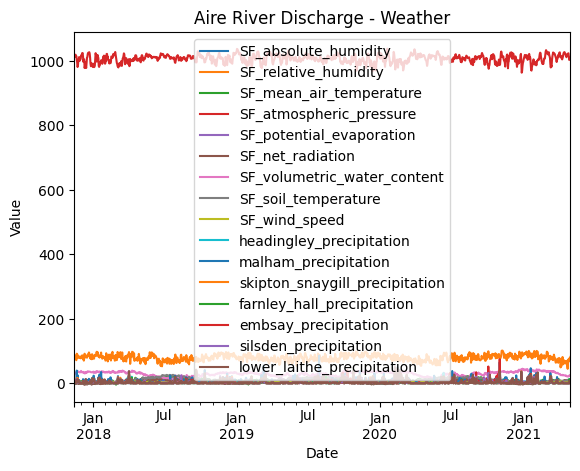

In [114]:
plot_time_series(aire_discharge_weather, title="Aire River Discharge - Weather");

## 

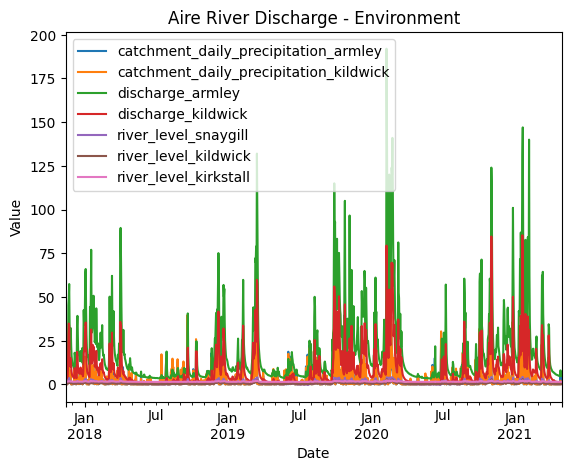

In [115]:
plot_time_series(aire_discharge_environment, title="Aire River Discharge - Environment");

## Mechanical Gear Vibration Dataset

In [141]:
gear_healthy = pd.read_csv(f"{path}/Mechanical Gear Vibration Dataset/no_fault.csv", parse_dates=["time_x"]);
gear_eccentricity = pd.read_csv(f"{path}/Mechanical Gear Vibration Dataset/eccentricity.csv", parse_dates=["time_x"]);
gear_missing_tooth = pd.read_csv(f"{path}/Mechanical Gear Vibration Dataset/missing_tooth.csv", parse_dates=["time_x"]);
gear_root_crack = pd.read_csv(f"{path}/Mechanical Gear Vibration Dataset/root_crack.csv", parse_dates=["time_x"]);
gear_surface_fault = pd.read_csv(f"{path}/Mechanical Gear Vibration Dataset/surface_fault.csv", parse_dates=["time_x"]);
gear_tooth_chipped_fault = pd.read_csv(f"{path}/Mechanical Gear Vibration Dataset/tooth_chipped_fault.csv", parse_dates=["time_x"]);

In [135]:
load1 = 0;
load2 = 80;
speed1 = 8.33203125;
speed2 = 25;
speed3 = 40;

In [140]:
loads = [load1, load2];
speeds = [speed1, speed2, speed3];

In [148]:
gear_healthy.loc[(gear_healthy["load_value"] == 0) & (gear_healthy["speedSet"] == 25)]

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc
50000,2.518537,2.426718,2023-05-02 11:29:24.000000,25.0,0,No fault
50001,2.516566,2.430660,2023-05-02 11:29:24.000200,25.0,0,No fault
50002,2.515416,2.427211,2023-05-02 11:29:24.000400,25.0,0,No fault
50003,2.515909,2.429346,2023-05-02 11:29:24.000600,25.0,0,No fault
50004,2.521165,2.426390,2023-05-02 11:29:24.000800,25.0,0,No fault
...,...,...,...,...,...,...
74995,2.518044,2.426554,2023-05-02 11:29:28.999000,25.0,0,No fault
74996,2.515909,2.429511,2023-05-02 11:29:28.999200,25.0,0,No fault
74997,2.514924,2.426718,2023-05-02 11:29:28.999400,25.0,0,No fault
74998,2.520508,2.426718,2023-05-02 11:29:28.999600,25.0,0,No fault


In [143]:
datasets = [gear_healthy, gear_eccentricity, gear_missing_tooth, gear_root_crack, gear_surface_fault, gear_tooth_chipped_fault];

In [171]:
series = [];

for dataset in datasets:

    for speed in speeds:

        for load in loads:

            series.append(dataset.loc[(dataset["load_value"] == load) & (dataset["speedSet"] == speed)][["time_x", "sensor1"]]); # sensor 2 can be included !

In [172]:
len(series)

36

In [173]:
series = [ts.reset_index().drop(columns=["index"]) for ts in series];

In [174]:
series = [ts.rename(columns={"time_x": f"time_{ind}", "sensor1": f"sensor1_{ind}"}) for ind, ts in enumerate(series)]; # sensor 2 can be included !

In [175]:
series = [ts.drop(columns=[f"time_{ind}"]) for ind, ts in enumerate(series)];

In [182]:
series = pd.concat(series, axis=1);

In [180]:
date = pd.date_range(start="2023/05/02 11:29:24", periods=25000, freq="200us");

In [187]:
mechanical_gear_series = series.set_index(date).reset_index().rename(columns={"index": "Date"});

In [190]:
data_report(mechanical_gear_series, "Date", "200us");

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [191]:
mechanical_gear_series.to_csv("C:/Users/User/Desktop/Project_repos/timecave/timecave/experiments/datasets/processed_data/mechanical_gear_vibration_data.csv", index=False);

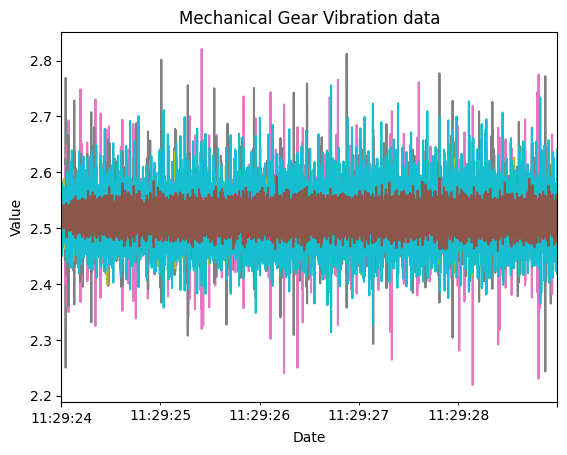

In [192]:
plot_time_series(mechanical_gear_series, legend=False, title="Mechanical Gear Vibration data");

## Gas Sensor Array under Dynamic Gas Mixtures

In [207]:
gas_array_ethylene_methane_data = pd.read_csv(f"{path}/Gas sensor array under dynamic gas mixtures/ethylene_methane.txt", sep="\t", names=["Time (seconds)", "Methane conc (ppm)", "Ethylene conc (ppm)", "sensor readings (16 channels)"]);

In [204]:
gas_array_ethylene_methane_data

,Time (seconds),Methane conc (ppm),Ethylene conc (ppm),sensor readings (16 channels)
0,"Time (seconds), Methane conc (ppm), Ethylene c...",NaN,NaN,NaN
1,0.00 0.00 0.00 -41.98 2067.64 -37.13...,NaN,NaN,NaN
2,0.01 0.00 0.00 -46.50 2067.88 -28.56...,NaN,NaN,NaN
3,0.02 0.00 0.00 -36.16 2055.81 -10.89...,NaN,NaN,NaN
4,0.03 0.00 0.00 -50.36 2053.68 -31.96...,NaN,NaN,NaN
...,...,...,...,...
4178500,41790.15 0.00 0.00 2348.01 1599.24 1329....,NaN,NaN,NaN
4178501,41790.16 0.00 0.00 2341.81 1605.37 1333....,NaN,NaN,NaN
4178502,41790.17 0.00 0.00 2345.78 1604.06 1337....,NaN,NaN,NaN
4178503,41790.18 0.00 0.00 2350.25 1594.86 1323....,NaN,NaN,NaN


In [210]:
file = f"{path}/Gas sensor array under dynamic gas mixtures/ethylene_methane.txt";

In [212]:
content = [];

with open(file, "r") as f:

    for line in f:

        content.append(line);

In [214]:
len(content)

4178505

In [222]:
content[3][:20]

'0.02    0.00    0.00'

In [225]:
len(content[1:])

4178504

In [228]:
data = [line[:20] for line in content[1:]];

In [230]:
len(data)

4178504

In [233]:
data[0][:4]

'0.00'

In [237]:
data[0][8:12]

'0.00'

In [238]:
data[0][16:]

'0.00'